# Technical Indicators Analysis — Stock Market

## Objective
Compute and analyze major technical indicators to understand:
- Trend
- Momentum
- Volatility
- Overbought/Oversold conditions

## Indicators Covered
- SMA / EMA
- RSI
- MACD
- Bollinger Bands
- Rolling Volatility


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px



In [14]:
def load_stooq(symbol, start=None, end=None):
    url = f"https://stooq.com/q/d/l/?s={symbol}&i=d"
    df = pd.read_csv(url, parse_dates=["Date"], index_col="Date")
    df = df.sort_index()

    if start:
        df = df[df.index >= start]
    if end:
        df = df[df.index <= end]

    return df

# choose your range here
aapl = load_stooq(
    "aapl.us",
    start="2010-01-01",
    end=pd.Timestamp.today()
)

aapl.head()


Open     High      Low    Close     Volume
Date                                                     
2010-01-04  6.40299  6.43301  6.36988  6.41840  585186012
2010-01-05  6.44185  6.46601  6.39581  6.42940  716156511
2010-01-06  6.42940  6.45505  6.32017  6.32677  655034271
2010-01-07  6.34867  6.35829  6.26949  6.31559  567320778
2010-01-08  6.31066  6.35829  6.26998  6.35809  532601139

In [15]:
aapl["SMA20"] = aapl["Close"].rolling(20).mean()
aapl["SMA50"] = aapl["Close"].rolling(50).mean()

aapl["EMA20"] = aapl["Close"].ewm(span=20).mean()


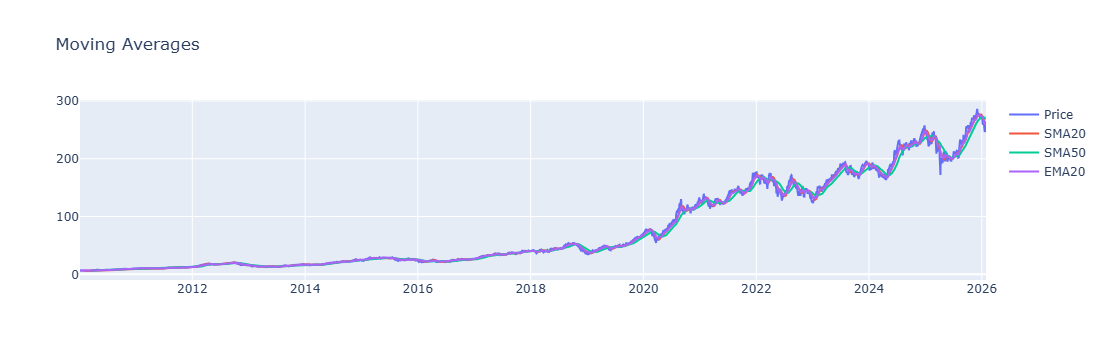

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=aapl.index, y=aapl["Close"], name="Price"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["SMA20"], name="SMA20"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["SMA50"], name="SMA50"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["EMA20"], name="EMA20"))

fig.update_layout(title="Moving Averages")
fig.show()


In [17]:
delta = aapl["Close"].diff()

gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
aapl["RSI"] = 100 - (100 / (1 + rs))


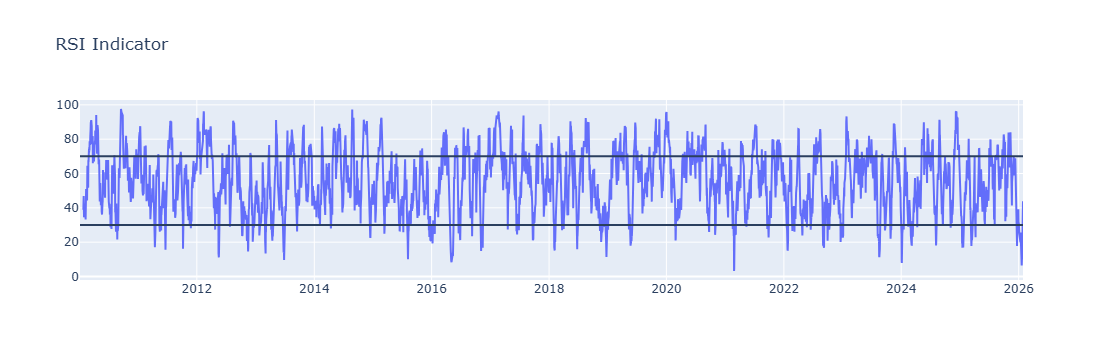

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=aapl.index, y=aapl["RSI"], name="RSI"))

fig.add_hline(y=70)
fig.add_hline(y=30)

fig.update_layout(title="RSI Indicator")
fig.show()


In [19]:
ema12 = aapl["Close"].ewm(span=12).mean()
ema26 = aapl["Close"].ewm(span=26).mean()

aapl["MACD"] = ema12 - ema26
aapl["Signal"] = aapl["MACD"].ewm(span=9).mean()


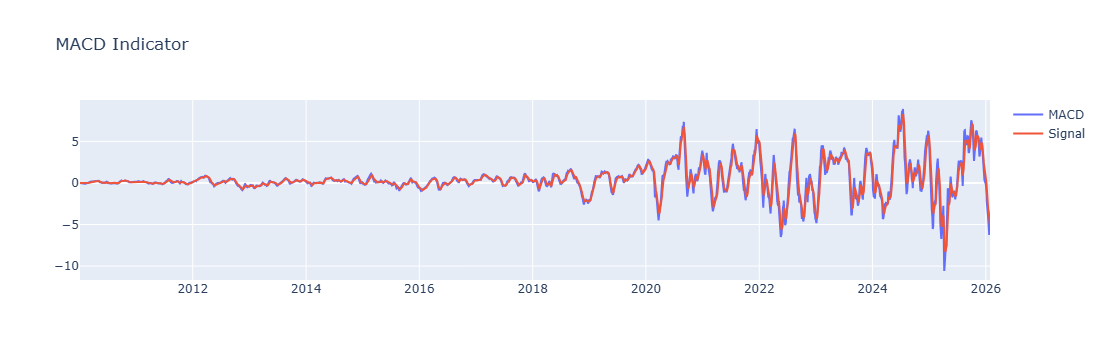

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=aapl.index, y=aapl["MACD"], name="MACD"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["Signal"], name="Signal"))

fig.update_layout(title="MACD Indicator")
fig.show()


In [21]:
aapl["BB_mid"] = aapl["Close"].rolling(20).mean()
std = aapl["Close"].rolling(20).std()

aapl["BB_upper"] = aapl["BB_mid"] + 2 * std
aapl["BB_lower"] = aapl["BB_mid"] - 2 * std


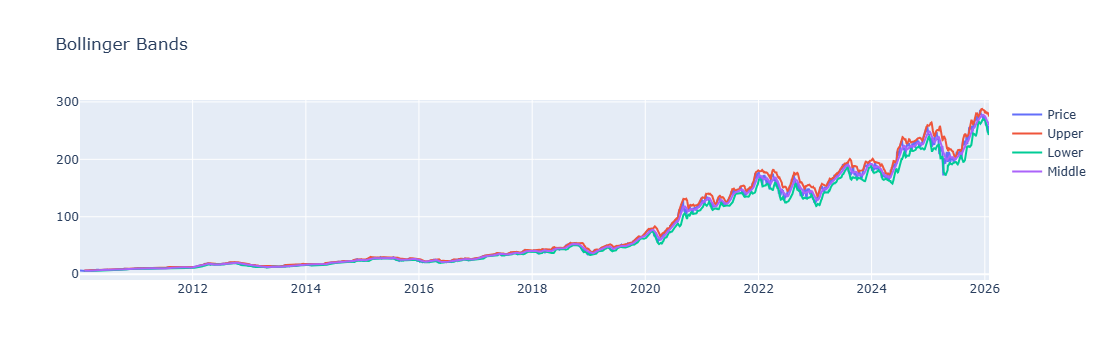

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=aapl.index, y=aapl["Close"], name="Price"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["BB_upper"], name="Upper"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["BB_lower"], name="Lower"))
fig.add_trace(go.Scatter(x=aapl.index, y=aapl["BB_mid"], name="Middle"))

fig.update_layout(title="Bollinger Bands")
fig.show()


In [23]:
aapl["Returns"] = aapl["Close"].pct_change()
aapl["Volatility20"] = aapl["Returns"].rolling(20).std() * np.sqrt(252)


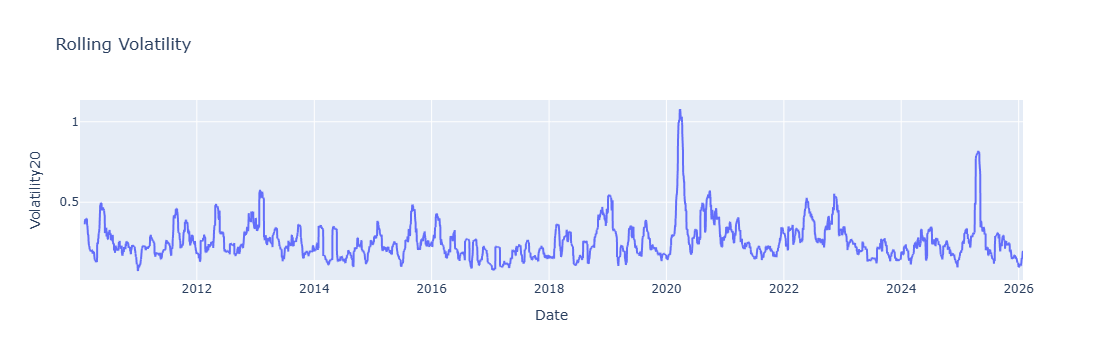

In [24]:
px.line(aapl, y="Volatility20", title="Rolling Volatility")


## Indicator Meanings

### SMA / EMA
Trend direction and crossover signals.

### RSI
> 70 → overbought  
< 30 → oversold

### MACD
MACD above signal → bullish momentum  
MACD below signal → bearish momentum

### Bollinger Bands
Price near upper band → stretched high  
Price near lower band → stretched low

### Volatility
Higher value → larger price swings


In [25]:
aapl.to_csv("data/processed/aapl_with_indicators.csv")
print("Indicator dataset saved")


Indicator dataset saved
